# Your name: Benjamin DeLeon
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [0]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Data File Reading Section
## Write code to read in data from external sources here

In [0]:
#read datasets
india = pd.read_csv('indiadata.csv')

india.head(5)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [0]:
#1
india.describe()

In [0]:
#2
india.shape()

In [0]:
#3
india.count()

In [0]:
#4
india.isna().sum()

In [0]:
#5
india.info()

In [0]:
#6
india.head()
india.tail()

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [0]:
# Cleaning up the data

#dropping columns that aren't required

india.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1)

# dropping rows where no date is available
nodate = india[india['date']=='NaN'].index
india.drop(nodate, inplace=True)

In [0]:
# displaying final columns (data.columns)
india


### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [0]:
# changing the types to uniform format
india.replace('Industrial Areas', 'Industrial Area')


In [0]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
india.type = india.type.replace(types)
india

### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [0]:
#creating a year column
india['date'] = pd.to_datetime(india['date'])
india['year'] = india['date'].dt.year


In [0]:
india.head()

### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [0]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset
import numpy as np
from sklearn.impute import SimpleImputer

COLS = ['so2','no2','spm', 'rspm', 'pm2_5']
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp = imp.fit(india[COLS])
india[COLS] = imp.transform(india[COLS])


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [0]:
import matplotlib.pyplot as plt


### so2 status

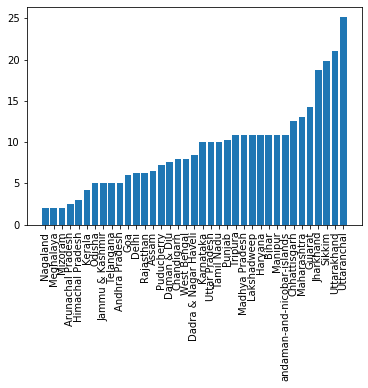

In [0]:
#A
india_so2 = india.groupby('state')['so2'].median()
ind_so2 = india_so2.sort_values(ascending=True)
#B
plt.bar(ind_so2.index,ind_so2)
plt.xticks(rotation=90)
plt.show()


With this visualization, you can see that Uttaranchal clearly has the highest amount of so2 and 
nagaland, Meghalaya, and Mizoram are among the few that have the lowest amounts of so2. There is a slow increase in so2 content, but plateaus over around 10 states, then has a sudden spike over the last few states.

### no2 status

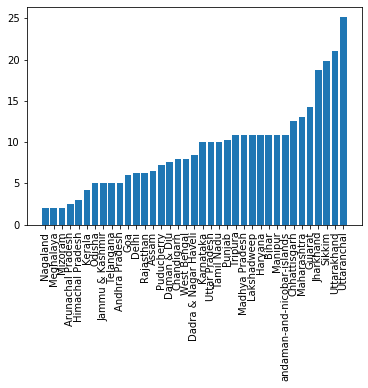

In [0]:
#A
india_no2 = india.groupby('state')['no2'].median()
ind_no2 = india_so2.sort_values(ascending=True)
#B
plt.bar(ind_no2.index,ind_no2)
plt.xticks(rotation=90)
plt.show()

Similar to so2 content, the no2 content shows that Uttaranchal has the most and Nagalayand, Meghalaya, and Mizoran are equally the lowest. They slowly increase content over the states, then plateaus, and then has a sudden spike over the last 10 states. 

### rspm status

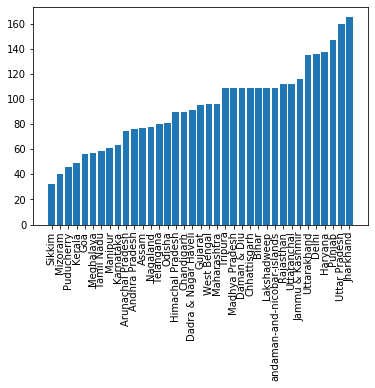

In [36]:
#A
india_rspm = india.groupby('state')['rspm'].median()
ind_rspm = india_rspm.sort_values(ascending=True)
#B
plt.bar(ind_rspm.index,ind_rspm)
plt.xticks(rotation=90)
plt.show()

It shows that there is a steady increase of rspm content with Sikkim having the lowest and Jharkhand having the highest amount. It is interesting that there is an equal amount of rspm content over 7 states. 

### spm status

In [0]:
#A
india_spm = india.groupby('state')['spm'].median()
ind_spm = india_spm.sort_values(ascending=True)
#B
plt.bar(ind_spm.index,ind_spm)
plt.xticks(rotation=90)
plt.show()

The spm content shows that over all the states, there is a high amount. Only two have low amounts, which are Sikkim and Manipur, and there are two which have higher amounts, which are Delhi and Uttaranchal. All the rest of the states have relatively the same amount, which is interesting.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [0]:

AP=india[india['state']=='Andhra Pradesh'].groupby('year').median()
AP.head(5)

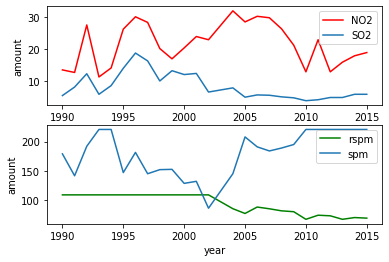

In [34]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

plt.subplot(2, 1, 1) 
plt.plot(AP.index,AP.no2,label='NO2', color='red')
plt.plot(AP.index,AP.so2,label='SO2')
plt.ylabel('amount')
plt.legend()

plt.subplot(2, 1, 2) 
plt.plot(AP.index,AP.rspm,label='rspm', color='green')
plt.plot(AP.index,AP.spm,label='spm')
plt.legend()
plt.xlabel('year')
plt.ylabel('amount')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



I find it interesting that there wasn't really a pattern of the air levels in Andhra Pradesh. It would move up and down over the year where some were sudden spikes. I found it interesting how the rspm levels remained low compared to the other content and continues to decrease, where spm continues to increase. I think it would be important to understand the reasoning as to why they are moving in opposite directions. 